In [ ]:
!pip install albumentations==0.4.6

     |████████████████████████████████| 117 kB 2.1 MB/s 
     |████████████████████████████████| 948 kB 7.7 MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-py3-none-any.whl size=65172 sha256=eff69be9a4d10cf78bf2e9af7acb317d62a24fc1d541e0efc4177fa28d4e67b4
  Stored in directory: /root/.cache/pip/wheels/cf/34/0f/cb2a5f93561a181a4bcc84847ad6aaceea8b5a3127469616cc
Successfully built albumentations
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving disc.pth.tar to disc.pth.tar
Saving gen.pth.tar to gen.pth.tar


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving disc.pth.tar to disc.pth.tar


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
PATH_OF_DATA= '/content/drive/"My Drive"/ok'
!ls {PATH_OF_DATA}

Data


In [ ]:
import torch
import numpy as np
import torchvision.transforms as transforms
import torchvision.datasets as datasets
# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([
                    transforms.CenterCrop(224),
                    transforms.ToTensor()])
# Comment 1 : Load the datasets with ImageFolder
image_datasets = datasets.ImageFolder(root= "/content/drive/My Drive/ok", transform=data_transforms)
# Comment 2: Using the image datasets and the transforms, define the dataloaders
dataloaders = torch.utils.data.DataLoader(image_datasets, batch_size=32, shuffle=True, num_workers=2)

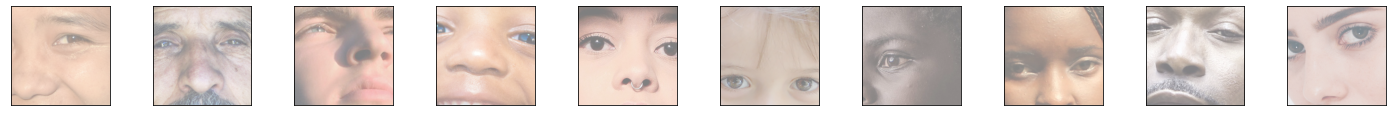

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image
    
    
dataiter = iter(dataloaders)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(10):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

In [ ]:
import torch
from PIL import Image
import albumentations as A
from albumentations.pytorch import ToTensorV2

LOAD_MODEL = True
SAVE_MODEL = True
CHECKPOINT_GEN = "/content/gen.pth.tar"
CHECKPOINT_DISC = "/content/disc.pth.tar"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
LEARNING_RATE = 1e-4
NUM_EPOCHS = 100
BATCH_SIZE = 16
NUM_WORKERS = 8
HIGH_RES = 96
LOW_RES = HIGH_RES // 4
IMG_CHANNELS = 3

highres_transform = A.Compose(
    [
        A.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
        ToTensorV2(),
    ]
)

lowres_transform = A.Compose(
    [
        A.Resize(width=LOW_RES, height=LOW_RES, interpolation=Image.BICUBIC),
        A.Normalize(mean=[0, 0, 0], std=[1, 1, 1]),
        ToTensorV2(),
    ]
)

both_transforms = A.Compose(
    [
        A.RandomCrop(width=HIGH_RES, height=HIGH_RES),
        A.HorizontalFlip(p=0.5),
        A.RandomRotate90(p=0.5),
    ]
)

test_transform = A.Compose(
    [
        A.Normalize(mean=[0, 0, 0], std=[1, 1, 1]),
        ToTensorV2(),
    ]
)

In [ ]:
import os
import numpy as np

from torch.utils.data import Dataset, DataLoader
from PIL import Image


class MyImageFolder(Dataset):
    def __init__(self, root_dir):
        super(MyImageFolder, self).__init__()
        self.data = []
        self.root_dir = root_dir
        self.class_names = os.listdir(root_dir)

        for index, name in enumerate(self.class_names):
            print(index)
            files = os.listdir(os.path.join(root_dir, name))
            self.data += list(zip(files, [index] * len(files)))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        img_file, label = self.data[index]
        root_and_dir = os.path.join(self.root_dir, self.class_names[label])

        image = np.array(Image.open(os.path.join(root_and_dir, img_file)))
        image = both_transforms(image=image)["image"]
        high_res = highres_transform(image=image)["image"]
        low_res = lowres_transform(image=image)["image"]
        return low_res, high_res


def test():
    dataset = MyImageFolder(root_dir="/content/drive/My Drive/ok")
    loader = DataLoader(dataset, batch_size=1, num_workers=8)

    for low_res, high_res in loader:
        print(low_res.shape)
        print(high_res.shape)


if __name__ == "__main__":
    test()

0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([1, 3, 24, 24])
torch.Size([1, 3, 96, 96])
torch.Size([1, 3, 24, 24])
torch.Size([1, 3, 96, 96])
torch.Size([1, 3, 24, 24])
torch.Size([1, 3, 96, 96])
torch.Size([1, 3, 24, 24])
torch.Size([1, 3, 96, 96])
torch.Size([1, 3, 24, 24])
torch.Size([1, 3, 96, 96])
torch.Size([1, 3, 24, 24])
torch.Size([1, 3, 96, 96])
torch.Size([1, 3, 24, 24])
torch.Size([1, 3, 96, 96])
torch.Size([1, 3, 24, 24])
torch.Size([1, 3, 96, 96])
torch.Size([1, 3, 24, 24])
torch.Size([1, 3, 96, 96])
torch.Size([1, 3, 24, 24])
torch.Size([1, 3, 96, 96])
torch.Size([1, 3, 24, 24])
torch.Size([1, 3, 96, 96])
torch.Size([1, 3, 24, 24])
torch.Size([1, 3, 96, 96])
torch.Size([1, 3, 24, 24])
torch.Size([1, 3, 96, 96])
torch.Size([1, 3, 24, 24])
torch.Size([1, 3, 96, 96])
torch.Size([1, 3, 24, 24])
torch.Size([1, 3, 96, 96])
torch.Size([1, 3, 24, 24])
torch.Size([1, 3, 96, 96])
torch.Size([1, 3, 24, 24])
torch.Size([1, 3, 96, 96])
torch.Size([1, 3, 24, 24])
torch.Size([1, 3, 96, 96])
torch.Size([1, 3, 24, 24])
t

In [ ]:

   
import torch.nn as nn
from torchvision.models import vgg19


# phi_5,4 5th conv layer before maxpooling but after activation

class VGGLoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.vgg = vgg19(pretrained=True).features[:36].eval().to(DEVICE)
        self.loss = nn.MSELoss()

        for param in self.vgg.parameters():
            param.requires_grad = False

    def forward(self, input, target):
        vgg_input_features = self.vgg(input)
        vgg_target_features = self.vgg(target)
        return self.loss(vgg_input_features, vgg_target_features)

In [ ]:
import torch
from torch import nn


class ConvBlock(nn.Module):
    def __init__(
        self,
        in_channels,
        out_channels,
        discriminator=False,
        use_act=True,
        use_bn=True,
        **kwargs,
    ):
        super().__init__()
        self.use_act = use_act
        self.cnn = nn.Conv2d(in_channels, out_channels, **kwargs, bias=not use_bn)
        self.bn = nn.BatchNorm2d(out_channels) if use_bn else nn.Identity()
        self.act = (
            nn.LeakyReLU(0.2, inplace=True)
            if discriminator
            else nn.PReLU(num_parameters=out_channels)
        )

    def forward(self, x):
        return self.act(self.bn(self.cnn(x))) if self.use_act else self.bn(self.cnn(x))


class UpsampleBlock(nn.Module):
    def __init__(self, in_c, scale_factor):
        super().__init__()
        self.conv = nn.Conv2d(in_c, in_c * scale_factor ** 2, 3, 1, 1)
        self.ps = nn.PixelShuffle(scale_factor)  # in_c * 4, H, W --> in_c, H*2, W*2
        self.act = nn.PReLU(num_parameters=in_c)

    def forward(self, x):
        return self.act(self.ps(self.conv(x)))


class ResidualBlock(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.block1 = ConvBlock(
            in_channels,
            in_channels,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.block2 = ConvBlock(
            in_channels,
            in_channels,
            kernel_size=3,
            stride=1,
            padding=1,
            use_act=False,
        )

    def forward(self, x):
        out = self.block1(x)
        out = self.block2(out)
        return out + x


class Generator(nn.Module):
    def __init__(self, in_channels=3, num_channels=64, num_blocks=16):
        super().__init__()
        self.initial = ConvBlock(in_channels, num_channels, kernel_size=9, stride=1, padding=4, use_bn=False)
        self.residuals = nn.Sequential(*[ResidualBlock(num_channels) for _ in range(num_blocks)])
        self.convblock = ConvBlock(num_channels, num_channels, kernel_size=3, stride=1, padding=1, use_act=False)
        self.upsamples = nn.Sequential(UpsampleBlock(num_channels, 2), UpsampleBlock(num_channels, 2))
        self.final = nn.Conv2d(num_channels, in_channels, kernel_size=9, stride=1, padding=4)

    def forward(self, x):
        initial = self.initial(x)
        x = self.residuals(initial)
        x = self.convblock(x) + initial
        x = self.upsamples(x)
        return torch.tanh(self.final(x))


class Discriminator(nn.Module):
    def __init__(self, in_channels=3, features=[64, 64, 128, 128, 256, 256, 512, 512]):
        super().__init__()
        blocks = []
        for idx, feature in enumerate(features):
            blocks.append(
                ConvBlock(
                    in_channels,
                    feature,
                    kernel_size=3,
                    stride=1 + idx % 2,
                    padding=1,
                    discriminator=True,
                    use_act=True,
                    use_bn=False if idx == 0 else True,
                )
            )
            in_channels = feature

        self.blocks = nn.Sequential(*blocks)
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((6, 6)),
            nn.Flatten(),
            nn.Linear(512*6*6, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 1),
        )

    def forward(self, x):
        x = self.blocks(x)
        return self.classifier(x)

def test():
    low_resolution = 24  # 96x96 -> 24x24
    with torch.cuda.amp.autocast():
        x = torch.randn((5, 3, low_resolution, low_resolution))
        gen = Generator()
        gen_out = gen(x)
        disc = Discriminator()
        disc_out = disc(gen_out)

        print(gen_out.shape)
        print(disc_out.shape)


if __name__ == "__main__":
    test()

/usr/local/lib/python3.7/dist-packages/torch/cuda/amp/autocast_mode.py:120: UserWarning: torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.")


torch.Size([5, 3, 96, 96])
torch.Size([5, 1])


In [ ]:
import os
import numpy as np
from PIL import Image
from torchvision.utils import save_image


def gradient_penalty(critic, real, fake, device):
    BATCH_SIZE, C, H, W = real.shape
    alpha = torch.rand((BATCH_SIZE, 1, 1, 1)).repeat(1, C, H, W).to(device)
    interpolated_images = real * alpha + fake.detach() * (1 - alpha)
    interpolated_images.requires_grad_(True)

    # Calculate critic scores
    mixed_scores = critic(interpolated_images)

    # Take the gradient of the scores with respect to the images
    gradient = torch.autograd.grad(
        inputs=interpolated_images,
        outputs=mixed_scores,
        grad_outputs=torch.ones_like(mixed_scores),
        create_graph=True,
        retain_graph=True,
    )[0]
    gradient = gradient.view(gradient.shape[0], -1)
    gradient_norm = gradient.norm(2, dim=1)
    gradient_penalty = torch.mean((gradient_norm - 1) ** 2)
    return gradient_penalty


def save_checkpoint(model, optimizer, filename="my_checkpoint.pth.tar"):
    print("=> Saving checkpoint")
    checkpoint = {
        "state_dict": model.state_dict(),
        "optimizer": optimizer.state_dict(),
    }
    torch.save(checkpoint, filename)


def load_checkpoint(checkpoint_file, model, optimizer, lr):
    print("=> Loading checkpoint")
    checkpoint = torch.load(checkpoint_file, map_location=DEVICE)
    model.load_state_dict(checkpoint["state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer"])

    # If we don't do this then it will just have learning rate of old checkpoint
    # and it will lead to many hours of debugging \:
    for param_group in optimizer.param_groups:
        param_group["lr"] = lr


def plot_examples(low_res_folder, gen):
    files = os.listdir(low_res_folder)

    gen.eval()
    for file in files:
        image = Image.open("/content/drive/My Drive/ok/" + file)
        with torch.no_grad():
            upscaled_img = gen(
                config.test_transform(image=np.asarray(image))["image"]
                .unsqueeze(0)
                .to(config.DEVICE)
            )
        save_image(upscaled_img * 0.5 + 0.5, f"saved/{file}")
    gen.train()

In [ ]:

import torch

from torch import nn
from torch import optim

from torch.utils.data import DataLoader

from tqdm import tqdm


torch.backends.cudnn.benchmark = True


def train_fn(loader, disc, gen, opt_gen, opt_disc, mse, bce, vgg_loss):
    loop = tqdm(loader, leave=True)

    for idx, (low_res, high_res) in enumerate(loop):
        high_res = high_res.to(DEVICE)
        low_res = low_res.to(DEVICE)
        
        ### Train Discriminator: max log(D(x)) + log(1 - D(G(z)))
        fake = gen(low_res)
        disc_real = disc(high_res)
        disc_fake = disc(fake.detach())
        disc_loss_real = bce(
            disc_real, torch.ones_like(disc_real) - 0.1 * torch.rand_like(disc_real)
        )
        disc_loss_fake = bce(disc_fake, torch.zeros_like(disc_fake))
        loss_disc = disc_loss_fake + disc_loss_real

        opt_disc.zero_grad()
        loss_disc.backward()
        opt_disc.step()

        # Train Generator: min log(1 - D(G(z))) <-> max log(D(G(z))
        disc_fake = disc(fake)
        #l2_loss = mse(fake, high_res)
        adversarial_loss = 1e-3 * bce(disc_fake, torch.ones_like(disc_fake))
        loss_for_vgg = 0.006 * vgg_loss(fake, high_res)
        gen_loss = loss_for_vgg + adversarial_loss

        opt_gen.zero_grad()
        gen_loss.backward()
        opt_gen.step()

        '''if idx % 2000 == 0:
            plot_examples("test_images/", gen)'''


def main():
    dataset = MyImageFolder(root_dir="/content/drive/My Drive/ok")
    loader = DataLoader(
        dataset,
        batch_size=BATCH_SIZE,
        shuffle=True,
        pin_memory=True,
        num_workers=NUM_WORKERS,
    )
    gen = Generator(in_channels=3).to(DEVICE)
    disc = Discriminator(in_channels=3).to(DEVICE)
    opt_gen = optim.Adam(gen.parameters(), lr=LEARNING_RATE, betas=(0.9, 0.999))
    opt_disc = optim.Adam(disc.parameters(), lr=LEARNING_RATE, betas=(0.9, 0.999))
    mse = nn.MSELoss()
    bce = nn.BCEWithLogitsLoss()
    vgg_loss = VGGLoss()

    if LOAD_MODEL:
        load_checkpoint(
            CHECKPOINT_GEN,
            gen,
            opt_gen,
            LEARNING_RATE
        )
        load_checkpoint(
           CHECKPOINT_DISC, disc, opt_disc,LEARNING_RATE,
        )

    for epoch in range(NUM_EPOCHS):
        train_fn(loader, disc, gen, opt_gen, opt_disc, mse, bce, vgg_loss)

        if SAVE_MODEL:
            save_checkpoint(gen, opt_gen, filename=CHECKPOINT_GEN)
            save_checkpoint(disc, opt_disc, filename=CHECKPOINT_DISC)
        if LOAD_MODEL:
            load_checkpoint(
            CHECKPOINT_GEN,
            gen,
            opt_gen,
            LEARNING_RATE
        )
            load_checkpoint(
            CHECKPOINT_DISC, disc, opt_disc,LEARNING_RATE,
        )
            
        


if __name__ == "__main__":
    main()

0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

  0%|          | 0/68 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100%|██████████| 68/68 [18:08<00:00, 16.01s/it]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 68/68 [18:18<00:00, 16.16s/it]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 68/68 [18:11<00:00, 16.05s/it]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 68/68 [18:07<00:00, 15.99s/it]


=> Saving checkpoint
=> Saving checkpoint


 91%|█████████ | 62/68 [16:45<01:35, 15.95s/it]